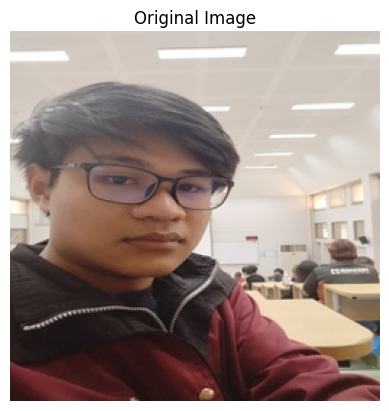

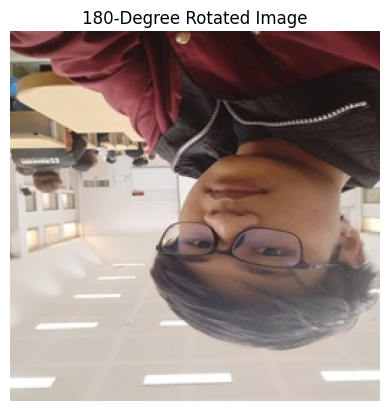

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = 'me256.jpg'  # Replace with your image path
image = Image.open(image_path)
image_array = np.array(image)

# Display the original image
plt.imshow(image_array)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Rotate the image by 180 degrees by reversing both rows and columns
rotated_image_array = image_array[::-1, ::-1]

# Display the rotated image
plt.imshow(rotated_image_array)
plt.title('180-Degree Rotated Image')
plt.axis('off')
plt.show()


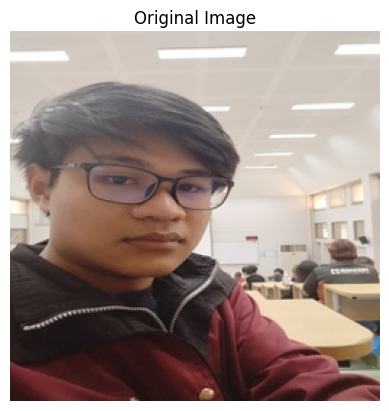

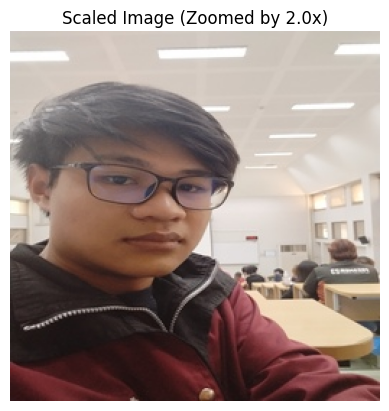

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def scale_image_reverse_mapping(image, scale_factor):
    # Get original image dimensions
    original_height, original_width = image.shape[:2]

    # Calculate new dimensions based on the scaling factor
    new_height = int(original_height * scale_factor)
    new_width = int(original_width * scale_factor)

    # Create an empty array for the scaled image
    scaled_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    # Reverse mapping: Map each pixel in the scaled image to the original image
    for i in range(new_height):
        for j in range(new_width):
            # Calculate the corresponding position in the original image
            orig_x = int(j / scale_factor)
            orig_y = int(i / scale_factor)
            
            # Boundary check
            orig_x = min(orig_x, original_width - 1)
            orig_y = min(orig_y, original_height - 1)

            # Assign pixel values from the original image
            scaled_image[i, j] = image[orig_y, orig_x]

    return scaled_image

# Load the image
image_path = 'me256.jpg'  # Replace with your image path
image = Image.open(image_path)
image_array = np.array(image)

# Display the original image
plt.imshow(image_array)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Set the scale factor (e.g., 2.0 for 2x zoom)
scale_factor = 2.0

# Scale the image using reverse mapping
scaled_image_array = scale_image_reverse_mapping(image_array, scale_factor)

# Display the scaled image
plt.imshow(scaled_image_array)
plt.title(f'Scaled Image (Zoomed by {scale_factor}x)')
plt.axis('off')
plt.show()


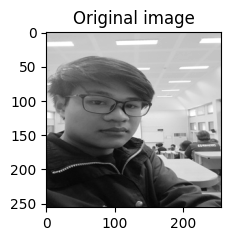

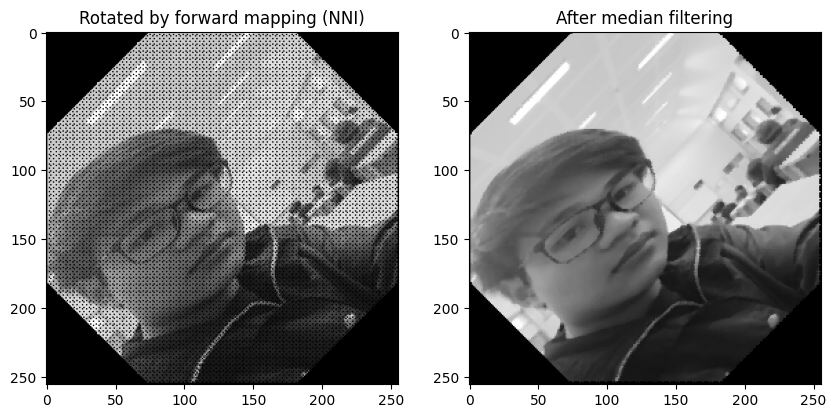

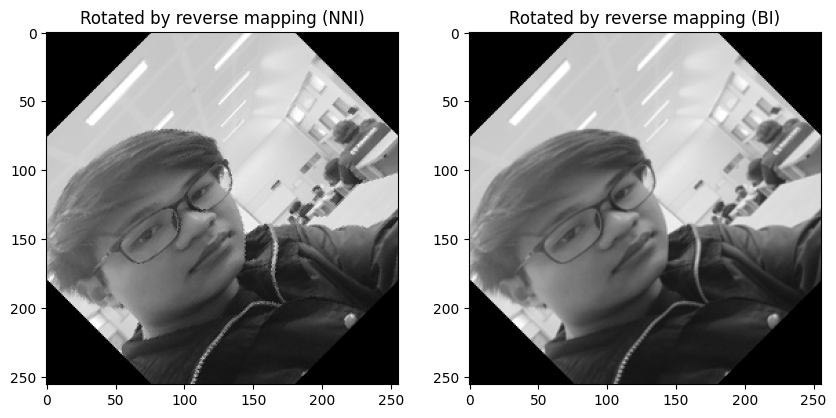

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.filters import median
from skimage.morphology import square

# Read the image and convert to grayscale
# Replace 'me256.jpg' with the path to your image file
img = cv2.imread('me256.jpg', cv2.IMREAD_GRAYSCALE)
img = img.astype(np.float64)  # Convert to double precision
v, h = img.shape

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original image')

# ============================================================
#   Image rotation
# ------------------------------------------------------------
theta = 45  # Rotation angle in degrees
rad = theta / 180 * np.pi  # Convert to radians
cx, cy = round(v / 2), round(h / 2)

oup2 = np.zeros((v, h))

# Forward mapping
for x in range(v):
    for y in range(h):
        xd = round((x - cx) * np.cos(rad) - (y - cy) * np.sin(rad)) + cx
        yd = round((x - cx) * np.sin(rad) + (y - cy) * np.cos(rad)) + cy

        if 0 < xd < (v - 1) and 0 < yd < (h - 1):
            oup2[xd, yd] = img[x, y]

oup2 = np.round((oup2 - oup2.min()) / (oup2.max() - oup2.min()) * 255)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(oup2.astype(np.uint8), cmap='gray')
plt.title('Rotated by forward mapping (NNI)')

# Apply median filtering
oup2 = median(oup2, square(3))
plt.subplot(1, 2, 2)
plt.imshow(oup2.astype(np.uint8), cmap='gray')
plt.title('After median filtering')
plt.show()

# Reverse mapping
oup3 = np.zeros((v, h))
oup4 = np.zeros((v, h))

for xd in range(v):
    for yd in range(h):
        x = (xd - cx) * np.cos(rad) + (yd - cy) * np.sin(rad) + cx
        y = -(xd - cx) * np.sin(rad) + (yd - cy) * np.cos(rad) + cy

        xp, yp = np.floor(x).astype(int), np.floor(y).astype(int)
        dx, dy = x - xp, y - yp

        if 1 <= xp < (v - 1) and 1 <= yp < (h - 1):
            # Nearest neighbor interpolation
            oup3[xd, yd] = img[round(x), round(y)]

            # Bilinear interpolation
            oup4[xd, yd] = (
                (1 - dx) * (1 - dy) * img[xp, yp]
                + (1 - dx) * dy * img[xp, yp + 1]
                + dx * dy * img[xp + 1, yp + 1]
                + dx * (1 - dy) * img[xp + 1, yp]
            )

oup3 = np.round((oup3 - oup3.min()) / (oup3.max() - oup3.min()) * 255)
oup4 = np.round((oup4 - oup4.min()) / (oup4.max() - oup4.min()) * 255)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(oup3.astype(np.uint8), cmap='gray')
plt.title('Rotated by reverse mapping (NNI)')

plt.subplot(1, 2, 2)
plt.imshow(oup4.astype(np.uint8), cmap='gray')
plt.title('Rotated by reverse mapping (BI)')
plt.show()


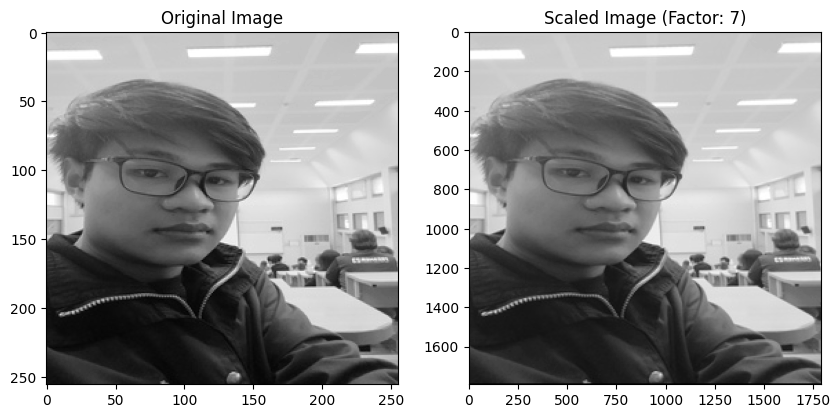

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read and convert the image to grayscale
img = cv2.imread('me256.jpg', cv2.IMREAD_GRAYSCALE)  # Change to your image path
v, h = img.shape

# Scaling factor
scale_factor = 7  # Example: Zooming in by a factor of 2
v_out = int(v * scale_factor)
h_out = int(h * scale_factor)

# Create an empty output image with the new size
output_img = np.zeros((v_out, h_out))

# Reverse Mapping
for x_out in range(v_out):
    for y_out in range(h_out):
        # Calculate the corresponding coordinates in the input image
        x = x_out / scale_factor
        y = y_out / scale_factor

        # Find the nearest coordinates (Nearest Neighbor Interpolation)
        x_nearest = int(round(x))
        y_nearest = int(round(y))

        # Ensure the coordinates are within the input image bounds
        if 0 <= x_nearest < v and 0 <= y_nearest < h:
            # Assign the corresponding pixel value
            output_img[x_out, y_out] = img[x_nearest, y_nearest]

# Normalize and convert to uint8 for display
output_img = np.round((output_img - output_img.min()) / (output_img.max() - output_img.min()) * 255)

# Display the original and scaled images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(output_img.astype(np.uint8), cmap='gray')
plt.title(f'Scaled Image (Factor: {scale_factor})')
plt.show()


In [7]:
import pandas as pd

# Define the RGB values from the table
rgb_values = {
    "(0, 1, 1)": [(2, 1, 2), (4, 4, 4), (3, 0, 3), (1, 2, 1)],
    "(1, 2, 3)": [(1, 7, 7), (4, 6, 7), (5, 2, 2), (0, 4, 4)],
    "(7, 7, 7)": [(2, 0, 2), (4, 5, 6), (1, 1, 1), (3, 1, 6)],
    "(5, 1, 2)": [(3, 3, 2), (1, 5, 7), (6, 6, 0), (3, 3, 3)],
    "(1, 1, 7)": [(5, 5, 0), (3, 6, 7), (2, 2, 2), (2, 4, 6)]
}

# Calculate Intensity and Saturation
results = []

for key, rgb_list in rgb_values.items():
    for rgb in rgb_list:
        R, G, B = rgb
        intensity = (R + G + B) / 3
        saturation = 1 - (min(R, G, B) / intensity) if intensity != 0 else 0
        results.append({
            "Location": key,
            "RGB": rgb,
            "Intensity": round(intensity, 2),
            "Saturation": round(saturation, 2)
        })

# Convert to DataFrame for display
df_results = pd.DataFrame(results)

# Display the DataFrame
print(df_results)


     Location        RGB  Intensity  Saturation
0   (0, 1, 1)  (2, 1, 2)       1.67        0.40
1   (0, 1, 1)  (4, 4, 4)       4.00        0.00
2   (0, 1, 1)  (3, 0, 3)       2.00        1.00
3   (0, 1, 1)  (1, 2, 1)       1.33        0.25
4   (1, 2, 3)  (1, 7, 7)       5.00        0.80
5   (1, 2, 3)  (4, 6, 7)       5.67        0.29
6   (1, 2, 3)  (5, 2, 2)       3.00        0.33
7   (1, 2, 3)  (0, 4, 4)       2.67        1.00
8   (7, 7, 7)  (2, 0, 2)       1.33        1.00
9   (7, 7, 7)  (4, 5, 6)       5.00        0.20
10  (7, 7, 7)  (1, 1, 1)       1.00        0.00
11  (7, 7, 7)  (3, 1, 6)       3.33        0.70
12  (5, 1, 2)  (3, 3, 2)       2.67        0.25
13  (5, 1, 2)  (1, 5, 7)       4.33        0.77
14  (5, 1, 2)  (6, 6, 0)       4.00        1.00
15  (5, 1, 2)  (3, 3, 3)       3.00        0.00
16  (1, 1, 7)  (5, 5, 0)       3.33        1.00
17  (1, 1, 7)  (3, 6, 7)       5.33        0.44
18  (1, 1, 7)  (2, 2, 2)       2.00        0.00
19  (1, 1, 7)  (2, 4, 6)       4.00     

In [10]:
import pandas as pd

# RGB values extracted from the image
rgb_values = [
    [(0, 1, 1), (1, 2, 3), (7, 7, 7), (5, 1, 2), (1, 1, 7)],
    [(2, 1, 2), (1, 7, 7), (2, 0, 2), (3, 3, 2), (5, 5, 0)],
    [(4, 4, 4), (4, 6, 7), (4, 5, 6), (1, 5, 7), (3, 6, 7)],
    [(3, 0, 3), (5, 2, 2), (1, 1, 1), (6, 6, 0), (2, 2, 2)],
    [(1, 2, 1), (0, 4, 4), (3, 1, 6), (3, 3, 3), (2, 4, 6)]
]

# Function to calculate intensity and saturation
def calculate_intensity_saturation(rgb):
    R, G, B = rgb
    intensity = (R + G + B) / 3
    if intensity == 0:
        saturation = 0  # Avoid division by zero
    else:
        saturation = 1 - (min(R, G, B) / intensity)
    return intensity, saturation

# Calculate intensity and saturation for each RGB value
results = []
for row in rgb_values:
    result_row = [calculate_intensity_saturation(rgb) for rgb in row]
    results.append(result_row)

# Convert results to a DataFrame for better visualization
df = pd.DataFrame(results, columns=['(0, 1, 1)', '(1, 2, 3)', '(7, 7, 7)', '(5, 1, 2)', '(1, 1, 7)'])

# Separate intensity and saturation into two DataFrames
df_intensity = df.applymap(lambda x: round(x[0], 2))
df_saturation = df.applymap(lambda x: round(x[1], 2))

# Display the results
print("Intensity Values:")
print(df_intensity)

print("\nSaturation Values:")
print(df_saturation)


SyntaxError: positional argument follows keyword argument (2573186208.py, line 33)